<a href="https://colab.research.google.com/github/ZuiTu00/lab2/blob/main/Zui_Tu_Class2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fredapi

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

In [ ]:
fred = Fred(api_key='f8d6c33cc180b9f38ea8fdf8080c13dd')

In [ ]:
print("Fetching data from Fred")
wages = fred.get_series('AHETPI')
cpi = fred.get_series('CPIAUCSL')

Fetching data from Fred


In [ ]:
df = pd.DataFrame({'Nominal_Wage': wages,'CPI': cpi})

In [ ]:
df = df.dropna()

In [ ]:
print(df.head())
print(df.tail())

            Nominal_Wage    CPI
1964-01-01          2.50  30.94
1964-02-01          2.50  30.91
1964-03-01          2.51  30.94
1964-04-01          2.52  30.95
1964-05-01          2.52  30.98
            Nominal_Wage      CPI
2025-07-01         31.35  322.132
2025-08-01         31.45  323.364
2025-09-01         31.52  324.368
2025-11-01         31.73  325.031
2025-12-01         31.76  326.030


In [ ]:
def get_real_wage(nominal_col, cpi_col):
    """
    Takes a nominal column and a CPI column.
    Returns a new column adjusted for inflation (Real Dollars).
    """
    cpi_today = cpi_col.iloc[-1]
    real_col = (nominal_col / cpi_col) * cpi_today

    return real_col
    df['Real_Wage'] = get_real_wage(df['Nominal_Wage'], df['CPI'])
print(df.tail())


            Nominal_Wage      CPI
2025-07-01         31.35  322.132
2025-08-01         31.45  323.364
2025-09-01         31.52  324.368
2025-11-01         31.73  325.031
2025-12-01         31.76  326.030


Step 1 - Data loaded successfully!
DataFrame shape: (743, 2)
Columns: ['Nominal_wage', 'CPI']

Step 2 - Real wage calculated!
            Nominal_wage      CPI  Real_Wage
2025-07-01         31.35  322.132  29.653917
2025-08-01         31.45  323.364  29.635167
2025-09-01         31.52  324.368  29.609195
2025-11-01         31.73  325.031  29.745665
2025-12-01         31.76  326.030  29.682558

Step 3 - Data validation:
Columns in DataFrame: ['Nominal_wage', 'CPI', 'Real_Wage']
Data types:
Nominal_wage    float64
CPI             float64
Real_Wage       float64
dtype: object
Any missing values:
Nominal_wage    0
CPI             0
Real_Wage       0
dtype: int64


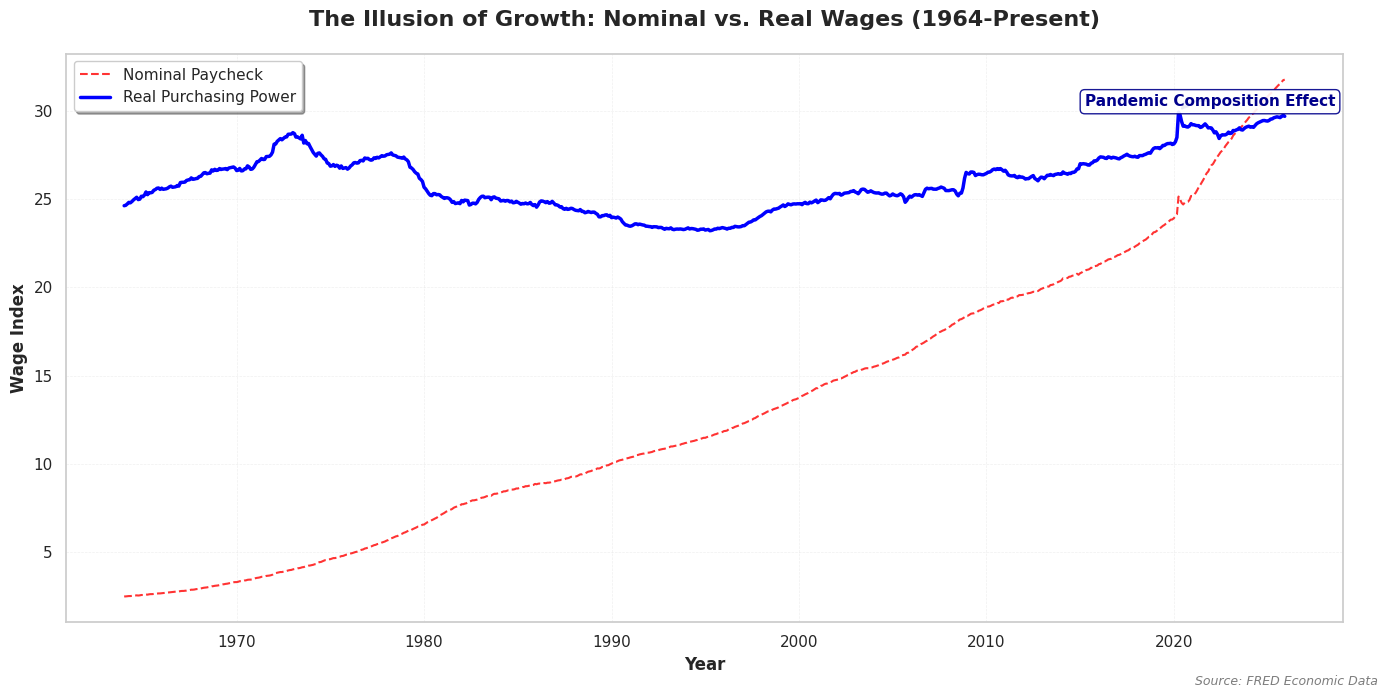


Step 4 - Visualization complete!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fredapi import Fred

# Phase 2: AI Expansion (Visualization)
fred = Fred(api_key='f8d6c33cc180b9f38ea8fdf8080c13dd')


wages = fred.get_series('AHETPI', start='1964-01-01')
cpi = fred.get_series('CPIAUCSL', start='1964-01-01')

df = pd.DataFrame({
    'Nominal_wage': wages,
    'CPI': cpi
})


df = df.dropna()

print("Step 1 - Data loaded successfully!")
print(f"DataFrame shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")


base_year = 2023
base_cpi_mask = df.index.year == base_year

if base_cpi_mask.any():
    base_cpi = df.loc[base_cpi_mask, 'CPI'].mean()
else:

    base_cpi = df['CPI'].iloc[-1]
    print(f"Warning: No data for {base_year}, using last available CPI as base")


df['Real_Wage'] = (df['Nominal_wage'] / df['CPI']) * base_cpi

print("\nStep 2 - Real wage calculated!")
print(df.tail())


print("\nStep 3 - Data validation:")
print(f"Columns in DataFrame: {df.columns.tolist()}")
print(f"Data types:\n{df.dtypes}")
print(f"Any missing values:\n{df.isnull().sum()}")


sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'


fig, ax = plt.subplots(figsize=(14, 7))


ax.plot(df.index,
        df['Nominal_wage'],
        color='red',
        linestyle='--',
        linewidth=1.5,
        alpha=0.8,
        label='Nominal Paycheck')


ax.plot(df.index,
        df['Real_Wage'],
        color='blue',
        linestyle='-',
        linewidth=2.5,
        label='Real Purchasing Power')


ax.set_title('The Illusion of Growth: Nominal vs. Real Wages (1964-Present)',
             fontsize=16,
             fontweight='bold',
             pad=20)

ax.set_xlabel('Year', fontsize=12, fontweight='semibold')
ax.set_ylabel('Wage Index', fontsize=12, fontweight='semibold')


mask_2020 = (df.index.year == 2020) & (df.index.month >= 3) & (df.index.month <= 6)

if mask_2020.any():

    pandemic_data = df.loc[mask_2020, 'Real_Wage']
    pandemic_idx = pandemic_data.idxmax()
    pandemic_value = pandemic_data.max()
else:

    mask_2020_any = df.index.year == 2020
    if mask_2020_any.any():
        pandemic_idx = df[mask_2020_any].index[len(df[mask_2020_any])//2]
        pandemic_value = df.loc[pandemic_idx, 'Real_Wage']
    else:
        pandemic_idx = None


if pandemic_idx is not None:

    text_x = pandemic_idx - pd.DateOffset(years=5)
    text_y = pandemic_value + (df['Real_Wage'].max() - df['Real_Wage'].min()) * 0.05

    ax.annotate('Pandemic Composition Effect',
                xy=(pandemic_idx, pandemic_value),
                xytext=(text_x, text_y),
                fontsize=11,
                fontweight='semibold',
                color='darkblue',
                bbox=dict(boxstyle="round,pad=0.3",
                         facecolor='white',
                         edgecolor='darkblue',
                         alpha=0.9),
                arrowprops=dict(arrowstyle='->',
                              connectionstyle='arc3,rad=0.3',
                              color='darkblue',
                              linewidth=1.5,
                              alpha=0.7))

ax.legend(loc='upper left',
          frameon=True,
          fancybox=True,
          shadow=True,
          fontsize=11)

ax.grid(True, linestyle='--', alpha=0.3, linewidth=0.5)
ax.grid(which='minor', linestyle=':', alpha=0.2, linewidth=0.3)

fig.text(0.99, 0.01, 'Source: FRED Economic Data',
         ha='right',
         fontsize=9,
         style='italic',
         alpha=0.6)

plt.tight_layout()

plt.show()

print("\nStep 4 - Visualization complete!")

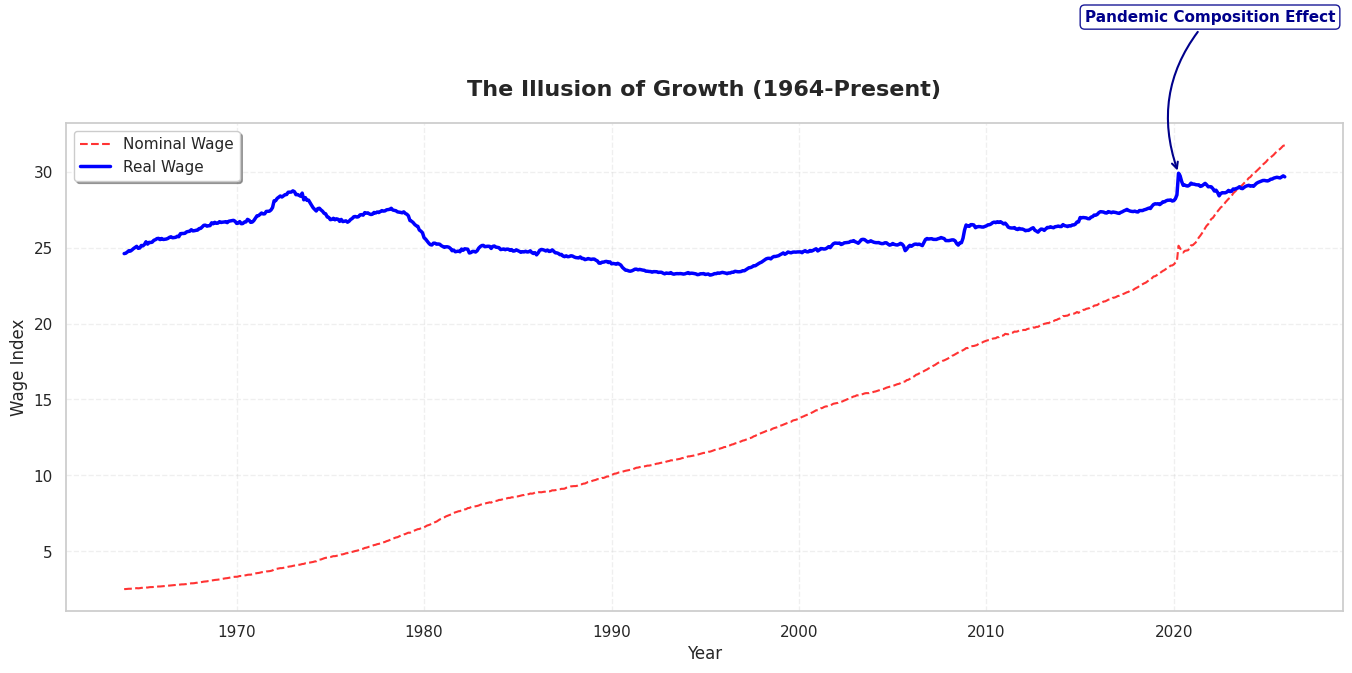

In [ ]:
##Phase 2: AI Expansion (Visualization & Analysis)
##Exercise 1: Visualizing the "Illusion"
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(14, 7))

plt.plot(df.index, df['Nominal_wage'],
         color='red',
         linestyle='--',
         linewidth=1.5,
         label='Nominal Wage',
         alpha=0.8)

plt.plot(df.index, df['Real_Wage'],
         color='blue',
         linestyle='-',
         linewidth=2.5,
         label='Real Wage')

plt.title('The Illusion of Growth (1964-Present)',
          fontsize=16,
          fontweight='bold',
          pad=20)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Wage Index', fontsize=12)

mask_2020 = (df.index.year == 2020) & (df.index.month >= 3) & (df.index.month <= 6)
if mask_2020.any():
    pandemic_idx = df.loc[mask_2020, 'Real_Wage'].idxmax()
    pandemic_value = df.loc[pandemic_idx, 'Real_Wage']
else:
    mask_2020_any = df.index.year == 2020
    if mask_2020_any.any():
        pandemic_idx = df[mask_2020_any].index[0]
        pandemic_value = df.loc[pandemic_idx, 'Real_Wage']
    else:
        pandemic_idx = None

if pandemic_idx is not None:
    plt.annotate('Pandemic Composition Effect',
                xy=(pandemic_idx, pandemic_value),
                xytext=(pandemic_idx - pd.DateOffset(years=5), pandemic_value + 10),
                fontsize=11,
                fontweight='bold',
                color='darkblue',
                bbox=dict(boxstyle='round,pad=0.3',
                         facecolor='white',
                         edgecolor='darkblue',
                         alpha=0.9),
                arrowprops=dict(arrowstyle='->',
                              connectionstyle='arc3,rad=0.3',
                              color='darkblue',
                              linewidth=1.5))

plt.legend(loc='upper left', fontsize=11, frameon=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

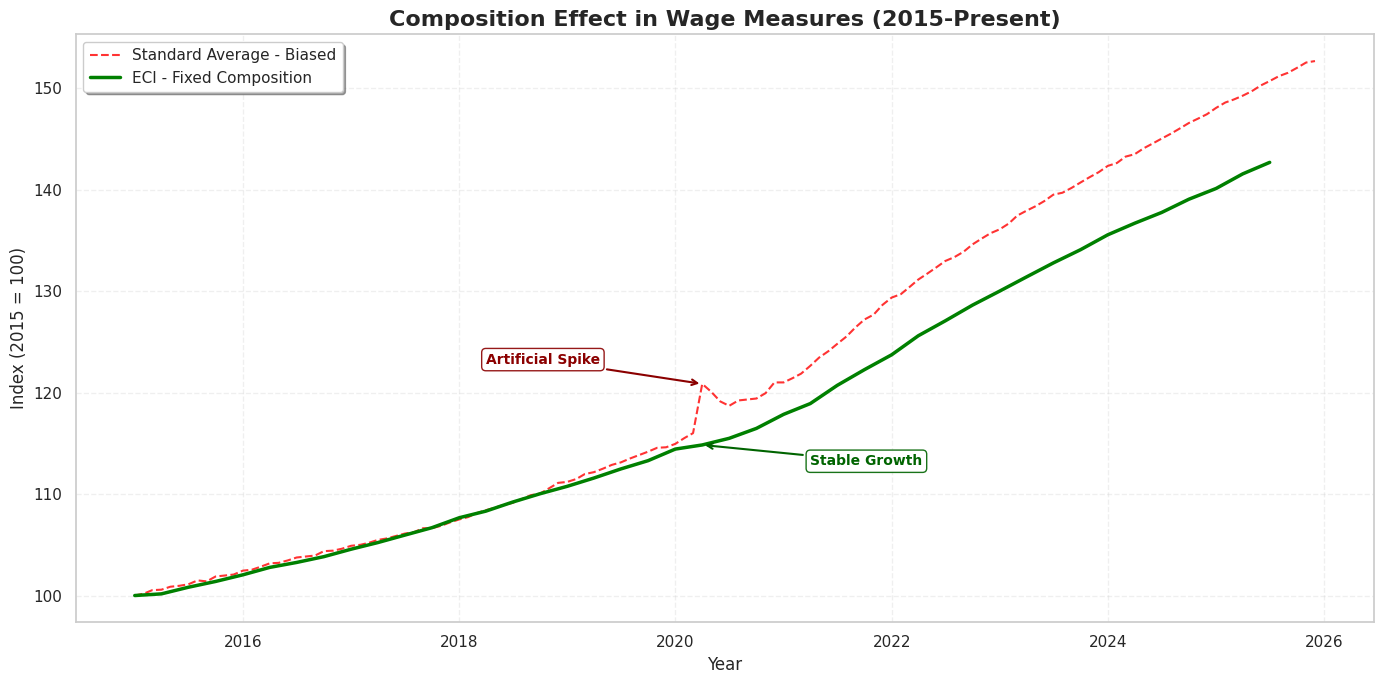

In [ ]:
##Exercise 2: Solving the "Pandemic Paradox" (Advanced)
import matplotlib.pyplot as plt
import pandas as pd

eciwag = fred.get_series('ECIWAG', start='2015-01-01')

wages_filtered = wages[wages.index >= '2015-01-01']
eciwag_filtered = eciwag[eciwag.index >= '2015-01-01']

wages_rebased = (wages_filtered / wages_filtered.iloc[0]) * 100
eciwag_rebased = (eciwag_filtered / eciwag_filtered.iloc[0]) * 100

plt.figure(figsize=(14, 7))

plt.plot(wages_rebased.index, wages_rebased,
         color='red',
         linestyle='--',
         linewidth=1.5,
         label='Standard Average - Biased',
         alpha=0.8)

plt.plot(eciwag_rebased.index, eciwag_rebased,
         color='green',
         linestyle='-',
         linewidth=2.5,
         label='ECI - Fixed Composition')

plt.title('Composition Effect in Wage Measures (2015-Present)',
          fontsize=16,
          fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Index (2015 = 100)', fontsize=12)

mask_2020 = (wages_rebased.index.year == 2020) & (wages_rebased.index.month >= 4) & (wages_rebased.index.month <= 6)
if mask_2020.any():
    spike_idx = wages_rebased[mask_2020].idxmax()
    spike_value = wages_rebased[spike_idx]
    eci_value_at_spike = eciwag_rebased[eciwag_rebased.index <= spike_idx].iloc[-1]

    plt.annotate('Artificial Spike',
                xy=(spike_idx, spike_value),
                xytext=(spike_idx - pd.DateOffset(years=2), spike_value + 2),
                fontsize=10,
                color='darkred',
                fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3',
                         facecolor='white',
                         edgecolor='darkred',
                         alpha=0.9),
                arrowprops=dict(arrowstyle='->',
                              color='darkred',
                              linewidth=1.5))

    plt.annotate('Stable Growth',
                xy=(spike_idx, eci_value_at_spike),
                xytext=(spike_idx + pd.DateOffset(years=1), eci_value_at_spike - 2),
                fontsize=10,
                color='darkgreen',
                fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3',
                         facecolor='white',
                         edgecolor='darkgreen',
                         alpha=0.9),
                arrowprops=dict(arrowstyle='->',
                              color='darkgreen',
                              linewidth=1.5))

plt.legend(loc='upper left', fontsize=11, frameon=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()